# Normalization and standardization

Feature Scaling is a technique that changes the range of values that a feature has. Doing so helps models learn faster and more robustly.

## Normalization versus standardization
*Normalization* means to scale values so that they all fit within a certain range, typically 0–1. For example, if you had a list of people’s ages that were 0, 50, and 100 years, you could normalize by dividing the ages by 100, so that your values were 0, 0.5, and 1.

*Standardization* is similar, but instead, we subtract the mean (also known as the average) of the values and divide by the standard deviation. If you’re not familiar with standard deviation, not to worry, this means that after standardization, our mean value is zero, and about 95% of values fall between -2 and 2.

There are other ways to scale data, but the nuances of these are beyond what we need to know right now. Let’s explore why we apply *normalization* or *standardization*.



## Why do we need to scale?
There are many reasons we normalize or standardize data before training. You can understand these more easily with an example. Let’s say we want to train a model to predict whether a dog will be successful at working in the snow. Our data are shown in the following graph as dots, and the trend line we're trying to find is shown as a solid line:

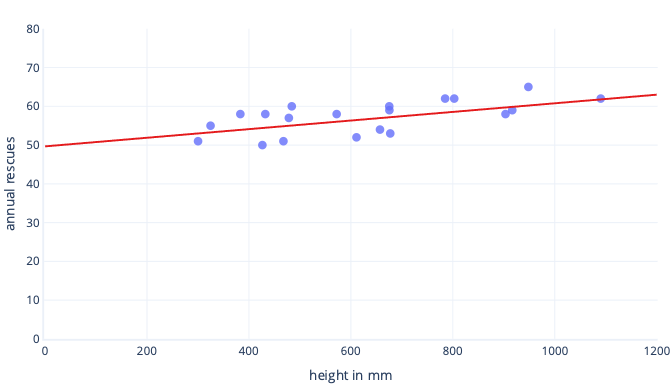

### Scaling gives learning a better starting point
The optimal line in the preceding graph has two parameters: the intercept, which is 50, the line at x=0, and slope, which is 0.01; each 1000 millimeters increases rescues by 10. Let’s assume we start training with initial estimates of 0 for both of these parameters.

If our training iterations are altering parameters by around 0.01 per iteration on average, it takes at least 5000 iterations before the intercept is found: 50 / 0.01 = 5000 iterations. Standardization can bring this optimal intercept is closer to zero, which means we can find it much faster. For example, if we subtract the mean from our label—annual rescues—and our feature—height—the intercept is -0.5, not 50, which we can find about 100 times faster.

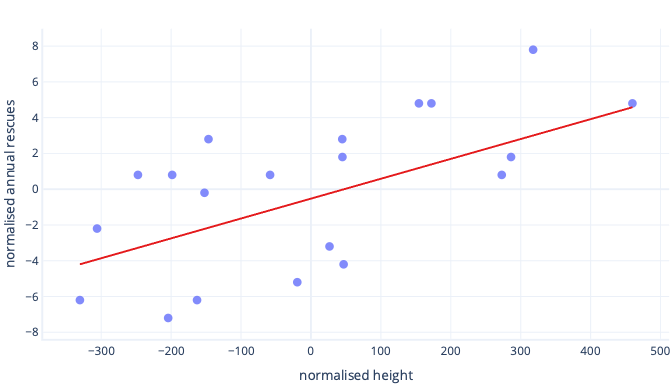

There are other reasons that complex models can be very slow to train when the initial guess is far from the mark, but the solution is still the same: offset features to something closer to the initial guess.

### Standardization lets parameters train at the same speed
In our newly offset data, we have an ideal offset of -0.5 and an ideal slope of 0.01. Although offsetting helps speed things up, it's still much slower to train the offset than to train the slope. This can slow things down and make training unstable.

For example, our initial guesses for offset and slope are both zero. If we're changing our parameters by about 0.1 on each iteration, we'll find the offset quickly, but it will be very difficult to find the correct slope, because increases in slope will be too large (0 + 0.1 > 0.01) and can overshoot the ideal value. We can make the adjustments smaller, but this will slow down how long it takes to find the intercept.

What happens if we scale our feature of height?

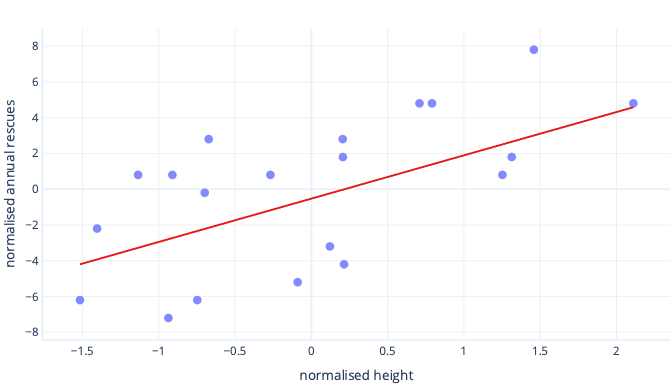

The slope of the line is now 0.5. Pay attention to the x-axis. Our optimal intercept of -0.5 and slope of 0.5 are the same scale! It's now easy to pick a sensible step size, which is how fast the gradient descent updates parameters.

### Scaling helps with multiple features
When we work with multiple features, having these on a different scale can cause issues in fitting, similarly to how we just saw with the intercept and slope examples. For example, if we're training a model that accepts both height in mm and weight in metric tons, many kinds of models will struggle to appreciate the importance of the weight feature, simply because it's so small relative to the height features.



## Do I always need to scale?
We don’t always need to scale. Some kinds of models, including the preceding models with straight lines, can be fit without an iterative procedure like gradient descent, so they don't mind features being the wrong size. Other models do need scaling to train well, but their libraries often perform feature scaling automatically.

Generally speaking, the only real downsides to normalization or standardization are that it can make it harder to interpret our models and that we have to write slightly more code. For this reason, feature scaling is a standard part of creating machine learning models.